# 3D ST dataset simulation

We generate cell positions in a 10\*10\*10 spatial region and divide it into three regions, guiding the spatial distribution of cell types according to different cell type ratios and transition matrices.

In [1]:
import spider as sp
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import itertools
import anndata as ad

In [2]:
image_width = 10
image_height = 10
image_depth = 10
cell_num=10000
Num_celltype=4
points_x = np.random.uniform(0, image_width, cell_num)
points_y = np.random.uniform(0, image_height, cell_num)
points_z = np.random.uniform(0, image_depth, cell_num)
cell_location = np.vstack((points_x, points_y, points_z)).T

In [3]:
mixed_zone1 = (cell_location[:, 0] < 4) & \
                 (cell_location[:, 1] < 4) & \
                 (cell_location[:, 2] < 4)
mixed_zone2 = (cell_location[:, 0] > image_width - 4) & \
             (cell_location[:, 1] > image_height - 4) & \
             (cell_location[:, 2] > image_depth - 4)


other_zone = ~(mixed_zone1 | mixed_zone2)

In [4]:
zone1_location = cell_location[mixed_zone1]
zone1_num = zone1_location.shape[0]

In [5]:
## Mixed
prior = np.array([0.01,0.33,0.33,0.33]) 
Num_ct_sample = sp.get_ct_sample(Num_celltype = Num_celltype, Num_sample =  zone1_num, prior = prior)
target_trans = sp.stripe_freq(Num_celltype)
target_trans[3,:] = np.array([0.45,0.05,0.05,0.45])
target_trans

array([[0.45, 0.45, 0.05, 0.05],
       [0.05, 0.45, 0.45, 0.05],
       [0.05, 0.05, 0.45, 0.45],
       [0.45, 0.05, 0.05, 0.45]])

In [6]:
res_1, _ = sp.simulate_10X_3d(cell_num=zone1_num,
                              Num_celltype=Num_celltype,
                              prior=prior,
                              target_trans=target_trans,

                              image_width=10,
                              image_height=10,
                              image_depth=10,
                              cell_location=zone1_location,
                              tol=2e-2,
                              T=1e-2,
                              loop_times=None,
                              smallsample_max_iter=100000,
                              bigsample_max_iter=10000)

swap_num:  1
Refine cell type using Metropolis–Hastings algorithm.
Sample num:617
10000 iteration, error 0.767
20000 iteration, error 0.793
30000 iteration, error 0.782
40000 iteration, error 0.784
50000 iteration, error 0.766
60000 iteration, error 0.755
70000 iteration, error 0.783
80000 iteration, error 0.782
90000 iteration, error 0.776
100000 iteration, error 0.783


In [7]:
zone2_location = cell_location[mixed_zone2]
zone2_num = zone2_location.shape[0]

In [8]:
## Mixed
prior = np.array([0.01,0.33,0.33,0.33]) 
Num_ct_sample = sp.get_ct_sample(Num_celltype = Num_celltype, Num_sample =  zone2_num, prior = prior)
target_trans = sp.stripe_freq(Num_celltype)
target_trans[3,:] = np.array([0.45,0.05,0.05,0.45])
target_trans

array([[0.45, 0.45, 0.05, 0.05],
       [0.05, 0.45, 0.45, 0.05],
       [0.05, 0.05, 0.45, 0.45],
       [0.45, 0.05, 0.05, 0.45]])

In [9]:
res_2, _ = sp.simulate_10X_3d(cell_num=zone2_num,
                              Num_celltype=Num_celltype,
                              prior=prior,
                              target_trans=target_trans,

                              image_width=10,
                              image_height=10,
                              image_depth=10,
                              cell_location=zone2_location,
                              tol=2e-2,
                              T=1e-2,
                              loop_times=None,
                              smallsample_max_iter=100000,
                              bigsample_max_iter=10000)

swap_num:  1
Refine cell type using Metropolis–Hastings algorithm.
Sample num:598
10000 iteration, error 0.802
20000 iteration, error 0.767
30000 iteration, error 0.794
40000 iteration, error 0.803
50000 iteration, error 0.803
60000 iteration, error 0.802
70000 iteration, error 0.776
80000 iteration, error 0.802
90000 iteration, error 0.796
100000 iteration, error 0.799


In [10]:
zone3_location = cell_location[other_zone]
zone3_num = zone3_location.shape[0]

In [11]:
## Mixed
prior = np.array([0.94,0.02,0.02,0.02]) 
Num_ct_sample = sp.get_ct_sample(Num_celltype = Num_celltype, Num_sample =  zone3_num, prior = prior)
target_trans = sp.addictive_freq(Num_celltype)
target_trans[1,:] =  np.repeat(0.25,4)
target_trans[2,:] =  np.repeat(0.25,4)
target_trans[3,:] =  np.repeat(0.25,4)
target_trans

array([[0.8       , 0.06666667, 0.06666667, 0.06666667],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      ]])

In [12]:
res_3, _ = sp.simulate_10X_3d(cell_num=zone3_num,
                              Num_celltype=Num_celltype,
                              prior=prior,
                              target_trans=target_trans,

                              image_width=10,
                              image_height=10,
                              image_depth=10,
                              cell_location=zone3_location,
                              tol=2e-2,
                              T=1e-2,
                              loop_times=None,
                              smallsample_max_iter=100000,
                              bigsample_max_iter=10000)

swap_num:  1
Refine cell type using Metropolis–Hastings algorithm.
Sample num:8785
10000 iteration, error 1.038
20000 iteration, error 1.036
30000 iteration, error 1.035
40000 iteration, error 1.035
50000 iteration, error 1.037
60000 iteration, error 1.035
70000 iteration, error 1.035
80000 iteration, error 1.037
90000 iteration, error 1.036
100000 iteration, error 1.038


In [13]:
cell_location 

array([[2.5133301 , 9.3451748 , 5.92689996],
       [3.09320824, 6.25485754, 5.72664263],
       [2.68836415, 2.33030128, 4.20549689],
       ...,
       [1.18473939, 7.34316272, 7.21401793],
       [0.94701773, 3.89963518, 7.39188892],
       [2.23298101, 2.31052682, 7.65738106]])

In [14]:
celltype_assignment = np.zeros(cell_num, dtype=int)
celltype_assignment[mixed_zone1] = res_1
celltype_assignment[mixed_zone2] = res_2
celltype_assignment[other_zone] = res_3

## generated gene expression profiles using reference dataset 

In [15]:
ref_path = "./Benchmark_datasets/"
ref_adata = sc.read(ref_path + "use_ref.h5ad")
ref_ct = ref_adata.obs.celltype.value_counts().nlargest(4).index.tolist()
match_list = dict(zip(range(Num_celltype),ref_ct))

In [16]:
spider_adata = sp.get_sim_cell_level_expr(celltype_assignment=celltype_assignment,
                                   adata=ref_adata,
                                   Num_celltype=Num_celltype,
                                   Num_ct_sample=np.bincount(celltype_assignment),
                                   match_list=match_list,
                                   ct_key="celltype")

In [17]:
spider_adata.obsm["spatial"] = cell_location
spider_adata.obs.index = [
    'cell' + str(j) for j in range(spider_adata.shape[0])
]

In [18]:
spider_adata

AnnData object with n_obs × n_vars = 10000 × 882
    obs: 'celltype', 'label'
    var: 'gene'
    uns: 'svg_scanpy', 'svg_squidpy'
    obsm: 'spatial'

## Visiualization of spatial distribution

In [19]:
fig1 = sp.plot_3d_cell_types(
    spider_adata.obsm["spatial"], 
    spider_adata.obs.celltype, 
    interactive=True,
    save_path="3d_cell_types_0710.html",
    auto_open=True
)

In [23]:
z_bins = np.arange(0,11,2)

In [24]:
slices = sp.slice_anndata_by_z(spider_adata, z_key='spatial', z_bins=z_bins)

Created slice 0 (Z=0.0-2.0) with 1994 cells
Created slice 1 (Z=2.0-4.0) with 1996 cells
Created slice 2 (Z=4.0-6.0) with 2039 cells
Created slice 3 (Z=6.0-8.0) with 1991 cells
Created slice 4 (Z=8.0-10.0) with 1980 cells


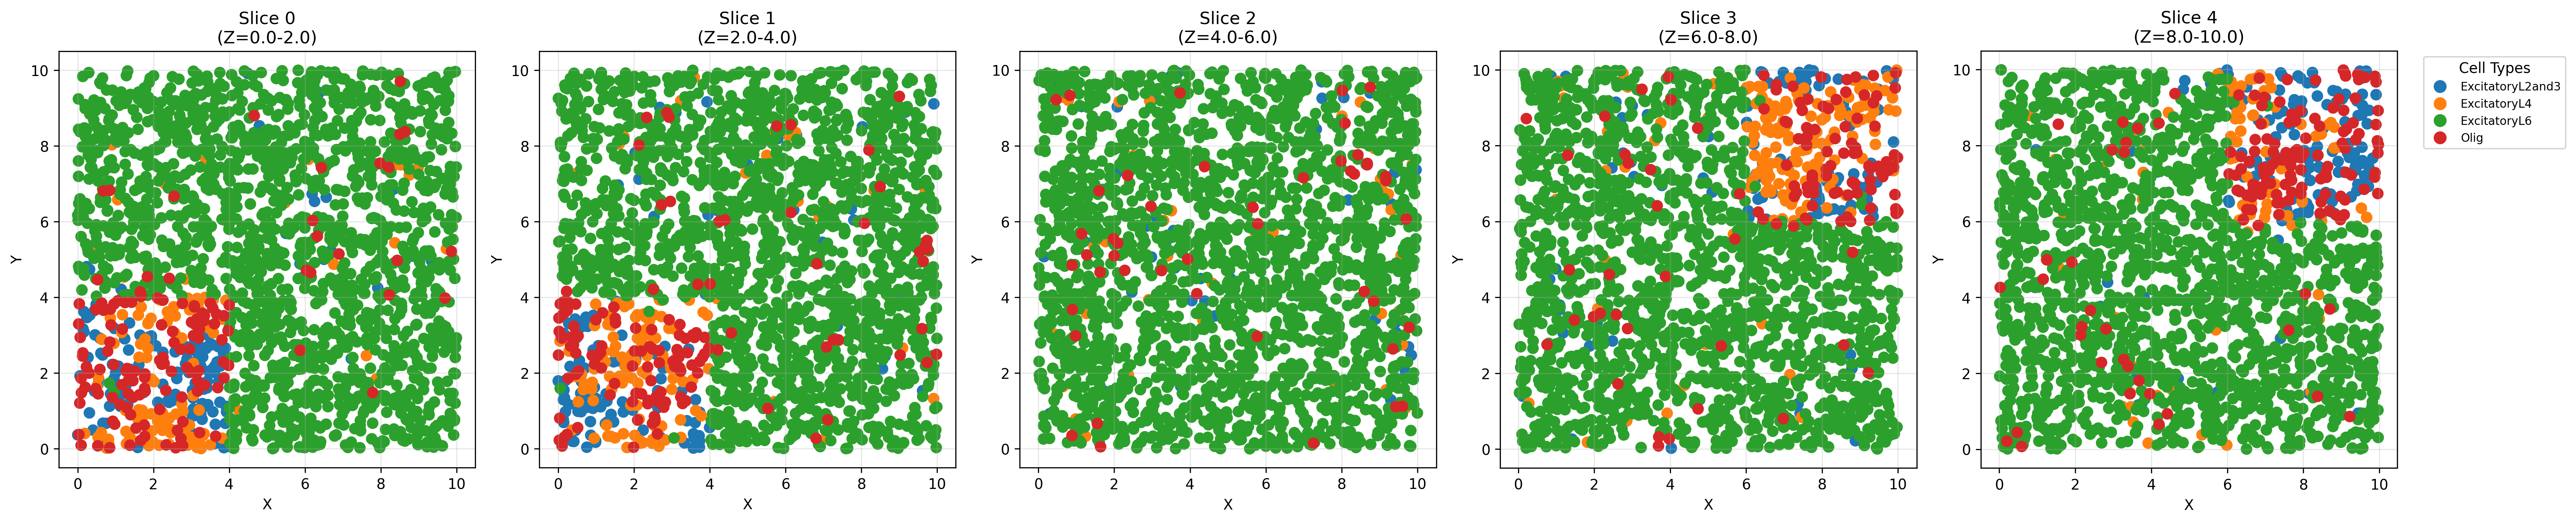

In [25]:
# Assuming 'slices' is your list of AnnData objects from slice_anndata_by_z()
fig2 = sp.plot_z_slices(
    slices,
    output_path='z_slices_visualization_0710.pdf',
    figsize_per_slice=5,
    dpi=300
)